In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('max_columns', 100)

In [2]:
df_origin = pd.read_csv('../data/historical_data/integrated_data.csv')
df_origin.head()

/home/dnj/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,35,36,39,41,50) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,raceid,racedate,KettoNum,KisyuCode,Time,KakuteiJyuni,Wakuban,Umaban,UmaKigoCD,SexCD,HinsyuCD,KeiroCD,Barei,TozaiCD,ChokyosiCode,BanusiCode,Futan,Blinker,MinaraiCD,BaTaijyu,IJyoCD,NyusenJyuni,DochakuKubun,DochakuTosu,ChakusaCD,ChakusaCDP,Ninki,Honsyokin,RecordUpKubun,DMGosaP,DMGosaM,DMJyuni,KyakusituKubun,RaceInfo$YoubiCD,RaceInfo$TokuNum,RaceInfo$Kakko,RaceInfo$KakkoEng,RaceInfo$Kubun,RaceInfo$Nkai,GradeCD,JyokenInfo$SyubetuCD,JyokenInfo$KigoCD,JyokenInfo$JyuryoCD,JyokenInfo$JyokenCD$1,JyokenInfo$JyokenCD$2,JyokenInfo$JyokenCD$3,JyokenInfo$JyokenCD$4,JyokenInfo$JyokenCD$5,Kyori,TrackCD,CourseKubunCD,Honsyokin$1,Honsyokin$2,Honsyokin$3,Honsyokin$4,Honsyokin$5,Honsyokin$6,Fukasyokin$1,Fukasyokin$2,Fukasyokin$3,Fukasyokin$4,Fukasyokin$5,TorokuTosu,SyussoTosu,NyusenTosu,TenkoBaba$TenkoCD,TenkoBaba$SibaBabaCD,TenkoBaba$DirtBabaCD,Zogen
0,2008-01-05 01:06,2008-01-05,2005107051,1031,752,8,1,1,0,2,1,3,3,1,437,898009,540,0,0,428,0,8,0,0,112,,9,0,0,0,0,9,2,1.0,0.0,,...,0.0,0.0,,12.0,023,3.0,0.0,703.0,0.0,0.0,703.0,1200.0,24.0,,50000.0,20000.0,13000.0,7500.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,2.0,0.0,1.0,12.0
1,2008-01-05 01:06,2008-01-05,2005102028,733,739,1,1,2,0,2,1,3,3,1,138,498800,540,0,0,450,0,1,0,0,,,4,50000,0,4,4,8,1,1.0,0.0,,...,0.0,0.0,,12.0,023,3.0,0.0,703.0,0.0,0.0,703.0,1200.0,24.0,,50000.0,20000.0,13000.0,7500.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,2.0,0.0,1.0,-10.0
2,2008-01-05 01:06,2008-01-05,2005104156,684,742,3,2,3,0,2,1,3,3,1,1054,486800,540,0,0,458,0,3,0,0,134,,5,13000,0,4,4,2,3,1.0,0.0,,...,0.0,0.0,,12.0,023,3.0,0.0,703.0,0.0,0.0,703.0,1200.0,24.0,,50000.0,20000.0,13000.0,7500.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,2.0,0.0,1.0,4.0
3,2008-01-05 01:06,2008-01-05,2005105319,672,749,6,2,4,0,2,1,3,3,1,1081,515800,540,0,0,402,0,6,0,0,212,,14,0,0,7,23,15,4,1.0,0.0,,...,0.0,0.0,,12.0,023,3.0,0.0,703.0,0.0,0.0,703.0,1200.0,24.0,,50000.0,20000.0,13000.0,7500.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,2.0,0.0,1.0,-10.0
4,2008-01-05 01:06,2008-01-05,2005101044,663,739,2,3,5,0,2,1,3,3,1,1088,163002,540,0,0,482,0,2,0,0,H,,6,20000,0,0,0,6,3,1.0,0.0,,...,0.0,0.0,,12.0,023,3.0,0.0,703.0,0.0,0.0,703.0,1200.0,24.0,,50000.0,20000.0,13000.0,7500.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,2.0,0.0,1.0,2.0


# Select some relevant columns

See `Horse-Race-Data-Description.xlsx` for more details

In [3]:
essential_cols = [
'raceid',
'racedate',
'Time', # THỜI GIAN
'KakuteiJyuni', # THỨ TỰ VỀ ĐÍCH
'DochakuKubun', # cùng về đích hay không
'DochakuTosu', # số lượng cùng về 3 giá trị
'Umaban', # số của ngựa: 18 giá trị
'KettoNum', # mã số đăng ký huyết thống
'UmaKigoCD', # loại ngựa (nguồn gốc) 8 giá trị
'SexCD', # giới tính: 3 giá trị
'HinsyuCD', # Product code: 2 giá trị
'KeiroCD', # màu lông 8 giá trị
'Barei', # tuổi ngựa
'TozaiCD', # khu vực: 4 giá trị
'ChokyosiCode', # code huấn luyện viên
'Futan', # khối lượng đảm nhiệm, đơn vị 0.1kg
'Blinker', # sử dụng bịt che mắt hay không
'KisyuCode', # Jockey code link với bảng 4
'MinaraiCD', # code thành tích jockey
'BaTaijyu', # khối lượng ngựa
'Zogen', # tăng hoặc giảm khối lượng
'IJyoCD', # code phân loại bất thường
'Honsyokin', # TIỀN THƯỞNG
'RaceInfo$YoubiCD', # ngày trong tuần hoặc holiday
'GradeCD', # mã cuộc đua đặc biệt
# 'JyokenInfo$KigoCD', # mã chủng loại cuộc đua
'JyokenInfo$JyuryoCD', # Weight type code
'Kyori', # CỰ LY theo m
'TrackCD', # loại sân
'TenkoBaba$TenkoCD', # MÃ THỜI TIẾT
'TenkoBaba$SibaBabaCD', # TÌNH TRẠNG SÂN CỎ
'TenkoBaba$DirtBabaCD', # TÌNH TRẠNG SÂN ĐẤT
]

In [4]:
df = df_origin[essential_cols].copy()
df.head(3)

,raceid,racedate,Time,KakuteiJyuni,DochakuKubun,DochakuTosu,Umaban,KettoNum,UmaKigoCD,SexCD,HinsyuCD,KeiroCD,Barei,TozaiCD,ChokyosiCode,Futan,Blinker,KisyuCode,MinaraiCD,BaTaijyu,Zogen,IJyoCD,Honsyokin,RaceInfo$YoubiCD,GradeCD,JyokenInfo$JyuryoCD,Kyori,TrackCD,TenkoBaba$TenkoCD,TenkoBaba$SibaBabaCD,TenkoBaba$DirtBabaCD
0,2008-01-05 01:06,2008-01-05,752,8,0,0,1,2005107051,0,2,1,3,3,1,437,540,0,1031,0,428,12.0,0,0,1.0,,3.0,1200.0,24.0,2.0,0.0,1.0
1,2008-01-05 01:06,2008-01-05,739,1,0,0,2,2005102028,0,2,1,3,3,1,138,540,0,733,0,450,-10.0,0,50000,1.0,,3.0,1200.0,24.0,2.0,0.0,1.0
2,2008-01-05 01:06,2008-01-05,742,3,0,0,3,2005104156,0,2,1,3,3,1,1054,540,0,684,0,458,4.0,0,13000,1.0,,3.0,1200.0,24.0,2.0,0.0,1.0


# Null values

In [5]:
df.isna().sum(axis=0)

raceid                     0
racedate                5165
Time                       0
KakuteiJyuni               0
DochakuKubun               0
DochakuTosu                0
Umaban                     0
KettoNum                   0
UmaKigoCD                  0
SexCD                      0
HinsyuCD                   0
KeiroCD                    0
Barei                      0
TozaiCD                    0
ChokyosiCode               0
Futan                      0
Blinker                    0
KisyuCode                  0
MinaraiCD                  0
BaTaijyu                   0
Zogen                    339
IJyoCD                     0
Honsyokin                  0
RaceInfo$YoubiCD        5165
GradeCD                 5165
JyokenInfo$JyuryoCD     5165
Kyori                   5165
TrackCD                 5165
TenkoBaba$TenkoCD       5165
TenkoBaba$SibaBabaCD    5165
TenkoBaba$DirtBabaCD    5165
dtype: int64

In [6]:
# fill missing values in Zogen column by 0
df.fillna({'Zogen':0.0}, inplace=True)

# Drop rows having time = 0
df.drop(df[df['Time'] == 0].index, inplace=True)

# EDA

In [7]:
print(f"""Number of unique horses: {df['KettoNum'].nunique()}
Number of races: {df['raceid'].nunique()}
Number of jockeys: {df['KisyuCode'].nunique()}""")

Number of unique horses: 54591
Number of races: 36285
Number of jockeys: 469


## Add some fields

In [8]:
df['Speed'] = df['Kyori']/df['Time']
df['Top 1'] = df['KakuteiJyuni'] < 2
df['Top 3'] = df['KakuteiJyuni'] < 4

In [9]:
class generate_exp():
    def __init__(self, colname, val = None):
        self.exp_dict = {}
        self.colname = colname
        self.val = val
    def generate_exp(self, row):
        if row[self.colname] in self.exp_dict:
            if self.val is None:
                self.exp_dict[row[self.colname]] += 1
            else:
                self.exp_dict[row[self.colname]] += row[self.val]
        else:
            self.exp_dict[row[self.colname]] = 0
        return self.exp_dict[row[self.colname]]

In [10]:
horse_exp = generate_exp('KettoNum')
df['Horse_exp'] = df.apply(horse_exp.generate_exp, axis=1)
jockey_exp = generate_exp('KisyuCode')
df['Jockey_exp'] = df.apply(jockey_exp.generate_exp, axis=1)
top3_horse = generate_exp('KettoNum', val='Top 3')
df['Horse_top3'] = df.apply(top3_horse.generate_exp, axis=1)
top3_jockey = generate_exp('KisyuCode', val='Top 3')
df['Jockey_top3'] = df.apply(top3_jockey.generate_exp, axis=1)

In [11]:
df.head(2)

,raceid,racedate,Time,KakuteiJyuni,DochakuKubun,DochakuTosu,Umaban,KettoNum,UmaKigoCD,SexCD,HinsyuCD,KeiroCD,Barei,TozaiCD,ChokyosiCode,Futan,Blinker,KisyuCode,MinaraiCD,BaTaijyu,Zogen,IJyoCD,Honsyokin,RaceInfo$YoubiCD,GradeCD,JyokenInfo$JyuryoCD,Kyori,TrackCD,TenkoBaba$TenkoCD,TenkoBaba$SibaBabaCD,TenkoBaba$DirtBabaCD,Speed,Top 1,Top 3,Horse_exp,Jockey_exp,Horse_top3,Jockey_top3
0,2008-01-05 01:06,2008-01-05,752,8,0,0,1,2005107051,0,2,1,3,3,1,437,540,0,1031,0,428,12.0,0,0,1.0,,3.0,1200.0,24.0,2.0,0.0,1.0,1.595745,False,False,0,0,0,0
1,2008-01-05 01:06,2008-01-05,739,1,0,0,2,2005102028,0,2,1,3,3,1,138,540,0,733,0,450,-10.0,0,50000,1.0,,3.0,1200.0,24.0,2.0,0.0,1.0,1.623816,True,True,0,0,0,0


# Analyze horses

In [12]:
def gender_identify(group):
    min_ = group.min()
    if min_ != group.max():
        return 4
    else:
        return min_

In [13]:
df_horse = df.groupby('KettoNum').agg({'SexCD':gender_identify,
                                        'HinsyuCD':'min',
                                        'KeiroCD':'min',
                                        'Top 1':'sum',
                                        'Top 3':'sum',
                                        'Time':'mean',
                                        'KakuteiJyuni':'min',
                                        'KettoNum':'count'})

In [14]:
df_horse.rename(columns={'KettoNum': 'Number of races', 'KakuteiJyuni': 'Best achievement'}, inplace=True)
df_horse['Top 3 rate'] = df_horse['Top 3']/df_horse['Number of races']                       
df_horse.head()

,SexCD,HinsyuCD,KeiroCD,Top 1,Top 3,Time,Best achievement,Number of races,Top 3 rate
KettoNum,,,,,,,,,
1996110169,1,1,3,0,0,843.333333,7,3,0.000000
1997103860,1,1,3,0,1,708.857143,2,7,0.142857
1997105482,3,1,3,1,4,1970.857143,1,7,0.571429
1998100158,1,1,3,0,0,1042.333333,9,3,0.000000
1998100265,3,1,4,1,1,1180.000000,1,9,0.111111


In [15]:
horse_map = {'SexCD': {0:'not set', 1:'Male',2:'Female',3:'Castrated male', 4:'Changed'},
            'HinsyuCD': {0:'not set', 1: 'Thoroughbred', 2:'< 25% Arab blood'},
            'KeiroCD': {0:  'not set',
                        1: 'Brown hair',
                        2:  'Tochi chestnut hair',
                        3:  'Bald hair',
                        4:  'Black deer',
                        5:  'Blue deer hair',
                        6:  'Blue hair',
                        7:  'Eyelash',
                        8:  'Chestnut hair',
                        9:  'Deer hair',
                        10: 'Blue hair',
                        11: 'White hair'}
}

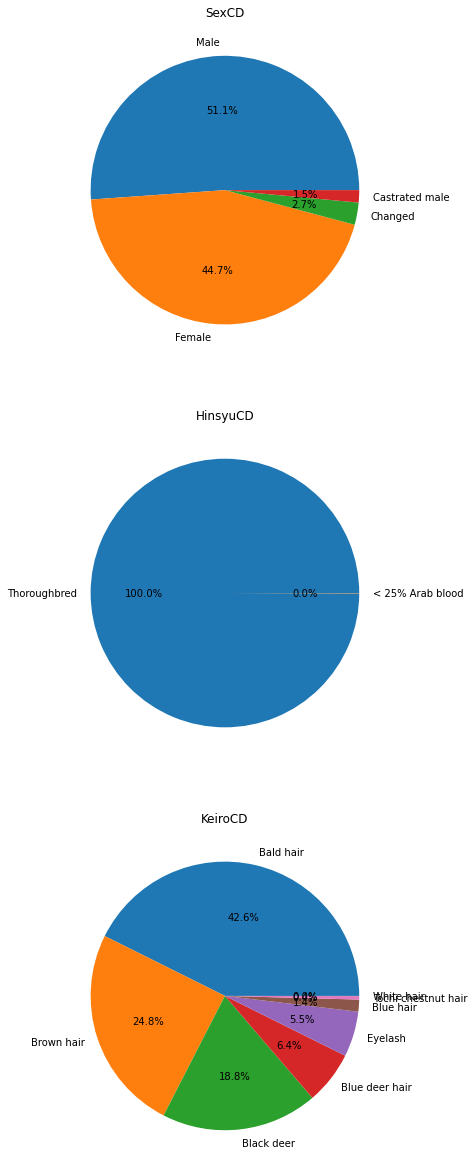

In [16]:
plt.figure(figsize=(7,21))
idx_ = 1
for col in ['SexCD', 'HinsyuCD', 'KeiroCD']:
    data_ = df_horse[col].value_counts()
    plt.subplot(3,1,idx_)
    plt.pie(x=data_, labels=[horse_map[col][int(i)] for i in data_.index], autopct='%1.1f%%')
    plt.title(col)
    idx_ += 1

In [52]:
print('5 horses with most win race')
df_horse.sort_values('Top 1', ascending=False).head()

5 horses with most win race


,SexCD,HinsyuCD,KeiroCD,Top 1,Top 3,Time,Best achievement,Number of races,Top 3 rate
KettoNum,,,,,,,,,
2009102739,1,1,7,15,21,1503.882353,1,34,0.617647
2011101125,1,1,3,12,15,2255.363636,1,22,0.681818
2012102013,1,1,3,12,18,1419.550000,1,20,0.900000
2006105022,1,1,3,11,14,1441.266667,1,45,0.311111
2009100301,2,1,3,11,17,760.827586,1,29,0.586207


In [18]:
print('5 horses with most top 3 award')
df_horse.sort_values('Top 3', ascending=False).head()

5 horses with most top 3 award


,SexCD,HinsyuCD,KeiroCD,Top 1,Top 3,Time,Best achievement,Number of races,Top 3 rate
KettoNum,,,,,,,,,
2010104176,1,1,3,7,30,1365.636364,1,77,0.389610
2010101161,1,1,3,5,29,1103.224138,1,58,0.500000
2008104798,1,1,3,7,27,1179.708333,1,48,0.562500
2007102721,1,1,1,6,27,934.900000,1,40,0.675000
2009103405,1,1,3,4,27,1154.772727,1,88,0.306818


In [53]:
print('5 horses with highest top 3 rate')
df_horse.sort_values('Top 3 rate', ascending=False).head()

5 horses with highest top 3 rate


,SexCD,HinsyuCD,KeiroCD,Top 1,Top 3,Time,Best achievement,Number of races,Top 3 rate
KettoNum,,,,,,,,,
2004102926,2,1,1,1,2,590.000000,1,2,1.0
2006106216,1,1,3,0,1,1094.000000,3,1,1.0
2012105402,1,1,3,1,3,754.666667,1,3,1.0
2007102755,1,1,1,0,1,958.000000,2,1,1.0
2014105869,2,1,3,0,3,1108.000000,2,3,1.0


In [54]:
df_horse.describe()

,SexCD,HinsyuCD,KeiroCD,Top 1,Top 3,Time,Best achievement,Number of races,Top 3 rate
count,54591.000000,54591.000000,54591.00000,54591.000000,54591.000000,54591.000000,54591.000000,54591.000000,54591.000000
mean,1.556997,1.000421,3.07950,0.666319,1.998315,1002.576214,5.280706,9.546647,0.140947
std,0.660652,0.020522,1.56673,1.259001,3.280661,215.232941,4.470932,9.324660,0.194120
min,1.000000,1.000000,1.00000,0.000000,0.000000,557.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,2.00000,0.000000,0.000000,831.577381,1.000000,3.000000,0.000000
50%,1.000000,1.000000,3.00000,0.000000,0.000000,995.809524,4.000000,6.000000,0.000000
75%,2.000000,1.000000,4.00000,1.000000,3.000000,1135.111111,9.000000,12.000000,0.250000
max,4.000000,2.000000,11.00000,15.000000,30.000000,3264.000000,18.000000,88.000000,1.000000


Text(0, 0.5, 'Top 3 rate')

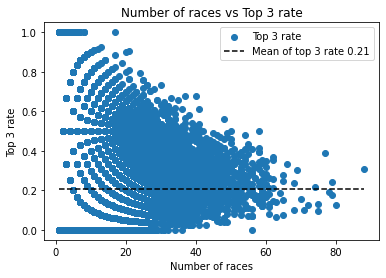

In [20]:
plt.scatter(x='Number of races', y='Top 3 rate', data=df_horse)
mean_top3_rate = df_horse['Top 3'].sum()/df_horse['Number of races'].sum()
plt.hlines(y=mean_top3_rate,
            xmin=df_horse['Number of races'].min(),
            xmax=df_horse['Number of races'].max(),
            colors='k',
            linestyles='--',
            label=f'Mean of top 3 rate {np.round(mean_top3_rate, 2)}')
plt.legend()
plt.title('Number of races vs Top 3 rate')
plt.xlabel('Number of races')
plt.ylabel('Top 3 rate')

## Analyze horse characteristics

In [40]:
def track_map(code):
    if code == 0:
        return 'Not set'
    elif code < 23:
        return 'Plain'
    elif code < 30:
        return 'Flat'
    else:
        return 'Obstacle'

In [47]:

df_group_ = df.groupby('TrackCD', dropna=True) # drop rows with nan values
groups_ = list(df_group_.groups.keys())
horse_performance_groups = {}
for group in groups_:
    horse_performance_groups[group] = df_group_.get_group(group).groupby('KettoNum').agg({'SexCD':gender_identify,
                                                                                        'HinsyuCD':'min',
                                                                                        'KeiroCD':'min',
                                                                                        'TozaiCD': 'min',
                                                                                        'Top 1':'sum',
                                                                                        'Top 3': 'sum',
                                                                                        'Speed': 'mean'})

### Gender

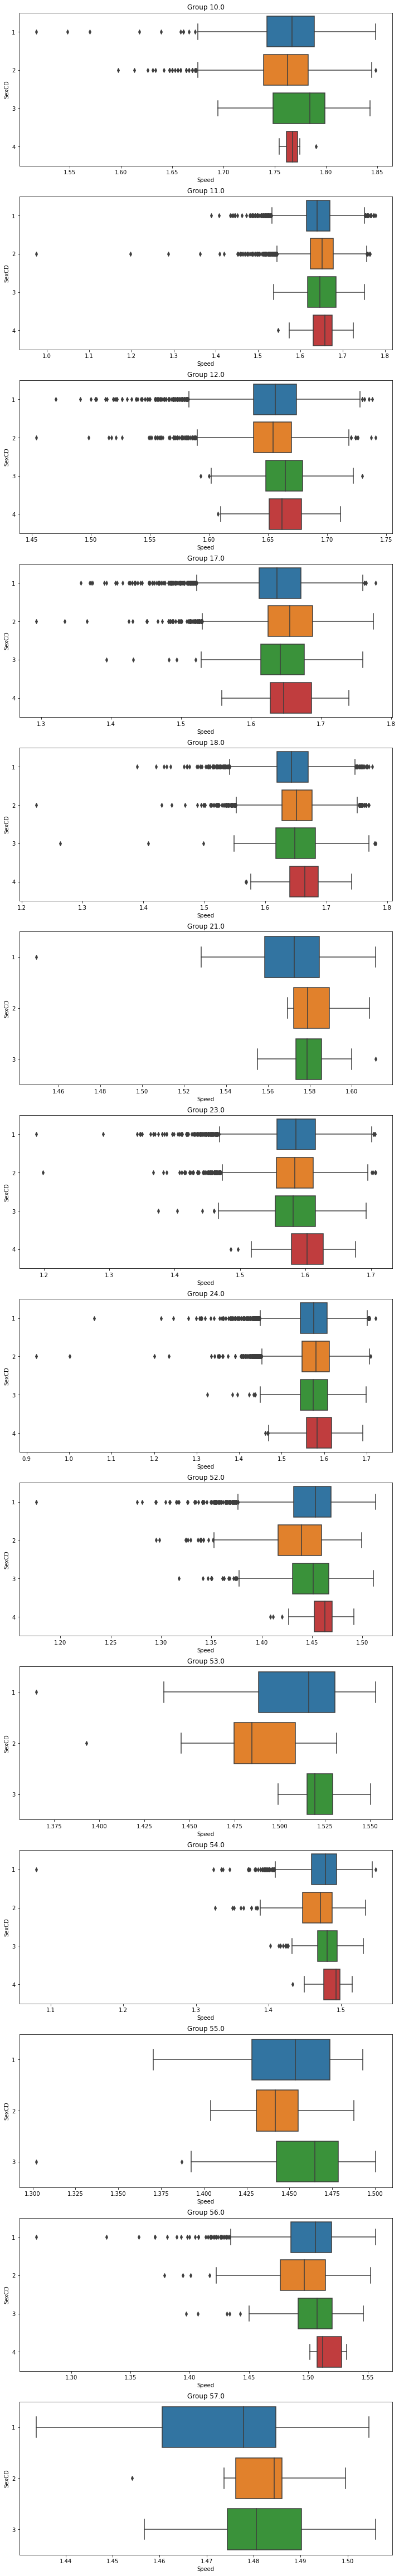

In [60]:
plt.figure(figsize=(12,df_group_.ngroups*6))
for idx, group in enumerate(groups_):
    plt.subplot(df_group_.ngroups, 1, idx+1)
    ax = sns.boxplot(data=horse_performance_groups[group], x='Speed', y='SexCD', orient='h')
    plt.title(f'Group {group}')

### Product code

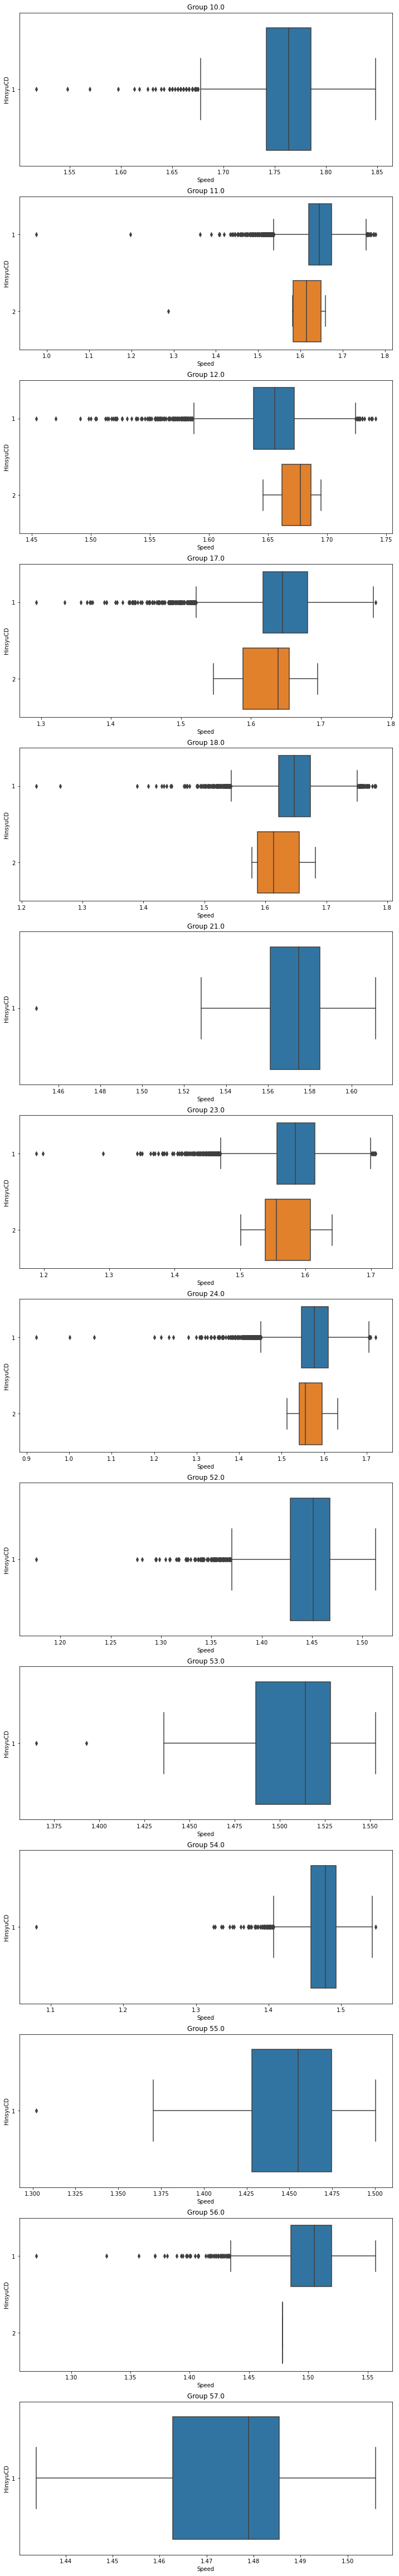

In [61]:
plt.figure(figsize=(12,df_group_.ngroups*6))
for idx, group in enumerate(groups_):
    plt.subplot(df_group_.ngroups, 1, idx+1)
    ax = sns.boxplot(data=horse_performance_groups[group], x='Speed', y='HinsyuCD', orient='h')
    plt.title(f'Group {group}')